In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.set_option('display.max_columns', 20)

In [20]:
df_hour = pd.read_csv('dataset/hour.csv')

In [21]:
df_hour.season = df_hour.season.apply( lambda x: 'Spring' if x == 1
                                        else 'Summer' if x == 2 
                                        else 'Fall'if x==3
                                        else 'Winter')

df_hour.weathersit = df_hour.weathersit.apply( lambda x: 'Clear' if x == 1
                                            else 'Cloudy' if x == 2 
                                            else 'Light Rain'if x==3
                                            else 'Heavy rain')

df_hour.holiday = df_hour.holiday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')

df_hour.workingday = df_hour.workingday.apply( lambda x: 'Yes' if x == 1
                                        else 'No')
df_hour.drop('instant', inplace = True, axis = 1)

In [22]:
display(df_hour.head(5))
display(df_hour.shape)
display(df_hour.columns)
display(df_hour.isnull().sum())


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,1,0,No,6,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,1,1,No,6,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,1,2,No,6,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,1,3,No,6,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,1,4,No,6,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


(17379, 16)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* bar plot of season,mnth,hr,holiday,weekday,wirkingday,weathersit to casual, registered, cnt
*regression plot of temp, atemp, hum, windspeed to casual, registered, cnt

In [23]:
categories = ['season','mnth','hr','holiday','weekday','wirkingday','weathersit']
counters = ['casual','registered','cnt']
continual = ['temp','atemp','hum','windspeed']

In [37]:
for idx, row in df_hour.iterrows():
    df_hour.at[idx, 'dteday'] = pd.to_datetime(df_hour.iloc[idx].dteday+f'T{df_hour.iloc[idx].hr}:00')

In [24]:
df_lw=df_hour[(df_hour.dteday > pd.to_datetime('2012-12-24') )& (df_hour.dteday <= pd.to_datetime('2012-12-31'))]

In [41]:
df_lw

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17212,2012-12-25,Spring,1,12,0,Yes,2,No,Light Rain,0.24,0.2576,0.93,0.0896,3,10,13
17213,2012-12-25,Spring,1,12,1,Yes,2,No,Cloudy,0.26,0.2576,0.87,0.1642,0,13,13
17214,2012-12-25,Spring,1,12,2,Yes,2,No,Cloudy,0.26,0.2576,0.87,0.1642,0,7,7
17215,2012-12-25,Spring,1,12,4,Yes,2,No,Cloudy,0.24,0.2576,0.87,0.0896,0,1,1
17216,2012-12-25,Spring,1,12,5,Yes,2,No,Cloudy,0.22,0.2273,0.93,0.1343,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,1,12,19,No,1,Yes,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,Spring,1,12,20,No,1,Yes,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,Spring,1,12,21,No,1,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,Spring,1,12,22,No,1,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


(array([15699., 15700., 15701., 15702., 15703., 15704., 15705.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

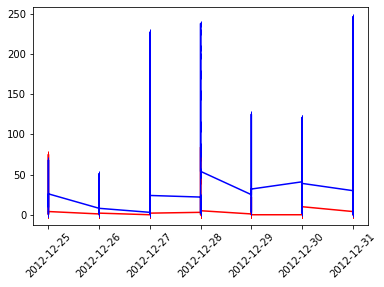

In [42]:
x = df_lw.dteday
y1=df_lw.casual
y2=df_lw.registered
plt.plot(x,y1,'|-r',x,y2,'|-b')
plt.xticks(rotation=45)